<a href="https://colab.research.google.com/github/PaulAndre1/fCC-projects/blob/main/Paul_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
import shutil
ruta_origen = '/content/cats_and_dogs/test'
ruta_destino = '/content/cats_and_dogs/test/animals'

# Asegurarse de que la carpeta de destino exista, si no, crearla
if not os.path.exists(ruta_destino):
    os.makedirs(ruta_destino)

# Obtener la lista de archivos en la carpeta de origen
archivos = os.listdir(ruta_origen)

# Mover cada archivo a la carpeta de destino
for archivo in archivos:
    shutil.move(os.path.join(ruta_origen, archivo), ruta_destino)

print("Imágenes movidas correctamente a la subcarpeta 'animals'.")

Imágenes movidas correctamente a la subcarpeta 'animals'.


In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1.0/255)
validation_image_generator = ImageDataGenerator(rescale = 1.0/255)
test_image_generator = ImageDataGenerator(rescale = 1.0/255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
    )
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
    )
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = None,
    shuffle = False
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


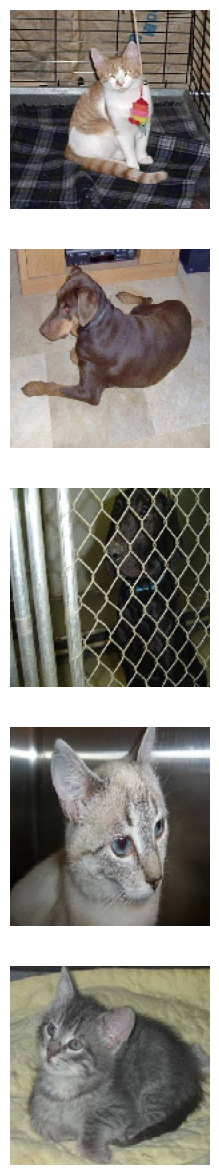

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


Found 2000 images belonging to 2 classes.


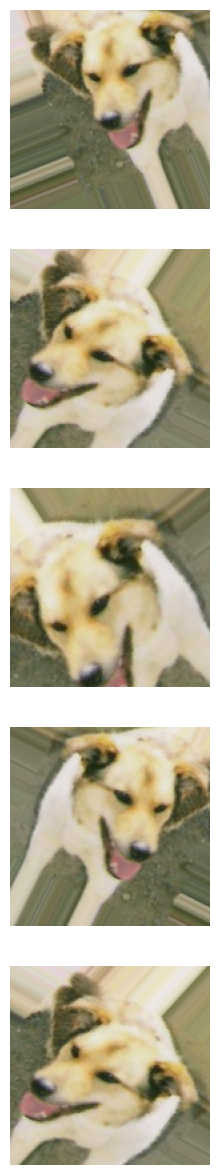

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 123s 8s/step - loss: 0.5877 - accuracy: 0.6870 - val_loss: 0.5849 - val_accuracy: 0.7065
Epoch 2/15
15/15 [==============================] - 114s 7s/step - loss: 0.5732 - accuracy: 0.7019 - val_loss: 0.5623 - val_accuracy: 0.6987
Epoch 3/15
15/15 [==============================] - 121s 8s/step - loss: 0.5334 - accuracy: 0.7308 - val_loss: 0.5876 - val_accuracy: 0.7065
Epoch 4/15
15/15 [==============================] - 123s 8s/step - loss: 0.5643 - accuracy: 0.7057 - val_loss: 0.5414 - val_accuracy: 0.7221
Epoch 5/15
15/15 [==============================] - 114s 7s/step - loss: 0.5296 - accuracy: 0.7249 - val_loss: 0.5109 - val_accuracy: 0.7489
Epoch 6/15
15/15 [==============================] - 121s 8s/step - loss: 0.5484 - accuracy: 0.7094 - val_loss: 0.5171 - val_accuracy: 0.7489
Epoch 7/15
15/15 [==============================] - 113s 7s/step - loss: 0.5107 - accuracy: 0.7382 - val_loss: 0.5642 - val_accuracy: 0.7054
Epoch 8/15
15

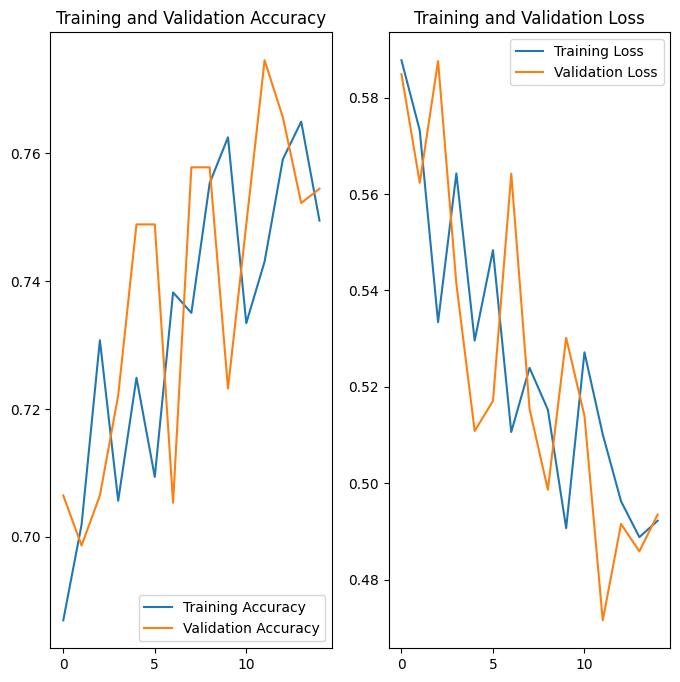

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#10
def make_predictions(data, steps):
  predictions = model.predict(data, steps = steps)
  return list([1 if pred >= 0.5 else 0 for pred in predictions]), predictions

predicitions, probabilities = make_predictions(data = test_data_gen, steps = total_test)

 1/51 [..............................] - ETA: 33s

51/51 [==============================] - 1s 193us/step


<ipython-input-6-e7cffa4c9536>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
<ipython-input-6-e7cffa4c9536>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % (probability*100) + "% dog")


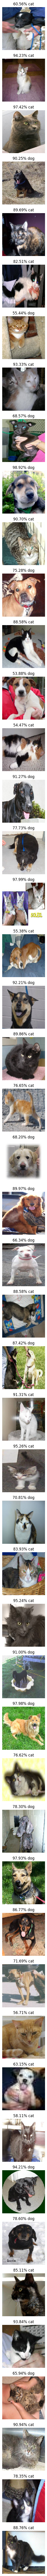

In [ ]:
sample_test_images = next(test_data_gen)
plotImages(sample_test_images, probabilities)

In [ ]:
print(probabilities)

[[0.3943987488746643], [0.057699572294950485], [0.025826090946793556], [0.902475118637085], [0.10306208580732346], [0.1749202162027359], [0.554416835308075], [0.06669578701257706], [0.6857367753982544], [0.9891725778579712], [0.09295454621315002], [0.7528414726257324], [0.11415908485651016], [0.5388227701187134], [0.4552749693393707], [0.9126580953598022], [0.7772811055183411], [0.9799297451972961], [0.44616854190826416], [0.9221252202987671], [0.1013578474521637], [0.2335195392370224], [0.6819959282875061], [0.8996716737747192], [0.6633791327476501], [0.11421437561511993], [0.8742231726646423], [0.08693790435791016], [0.04744638502597809], [0.7081098556518555], [0.16067837178707123], [0.04764833673834801], [0.9100374579429626], [0.9797528386116028], [0.23378123342990875], [0.7829753160476685], [0.9793478846549988], [0.8676921129226685], [0.28313958644866943], [0.432854562997818], [0.36850568652153015], [0.41887688636779785], [0.9421005249023438], [0.7860234975814819], [0.1489436924457

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability[0]) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 82.0% of the images of cats and dogs.
You passed the challenge!


In [ ]:
print(test_dir)

cats_and_dogs/test


In [ ]:
total_test_01 = len(os.listdir('/content/prueba/animal'))
test_image_generator_01 = ImageDataGenerator(rescale = 1.0/255)
test_data_gen_01 = test_image_generator_01.flow_from_directory(
    '/content/prueba/animal',
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary',
    shuffle = False
    )
print(total_test_01)

Found 2 images belonging to 2 classes.
2


1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 11ms/step


<ipython-input-6-e7cffa4c9536>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % ((1-probability)*100) + "% cat")


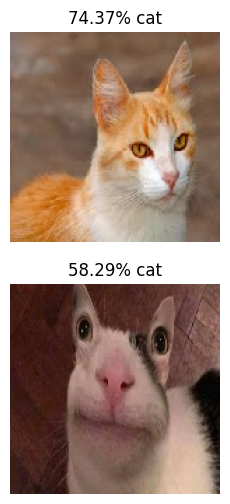

In [ ]:
predicitions, probabilities01 = make_predictions(test_data_gen_01, total_test_01)
sample_test_images_01, _ = next(test_data_gen_01)
plotImages(sample_test_images_01, probabilities01)

In [ ]:
print(probabilities01)

[[0.25629285]
 [0.41708556]]
